In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# San Francisco Bicycle Related Traffic Crash Analysis Sent From The APP

This page displays several summary statistics about road accidents invovling bicycles in San Francisco. Data is accessed via SFMTA traffic crashes resulting in injury dataset, and is filtered to include crashes where one or more parties were bicylists. 

    party_at_fault party_at_fault_name
0              NaN                None
1              1.0              Driver
3              NaN                None
4              NaN                None
7              NaN                None
14             1.0              Driver
16             NaN                None
17             NaN                None
18             NaN                None
19             NaN                None


/var/folders/ry/6zlsyrrj22zffwv1bszfkwz80000gn/T/ipykernel_7488/1622528483.py:1: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('Traffic_crashes_Resulting_in_Injury_20250714.csv')
/var/folders/ry/6zlsyrrj22zffwv1bszfkwz80000gn/T/ipykernel_7488/1622528483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['party_at_fault_name'] = bike_data.apply(resolve_party_at_fault, axis=1)


(array([1.334e+03, 4.235e+03, 0.000e+00, 4.325e+03, 0.000e+00, 9.300e+01,
        2.450e+02, 0.000e+00, 1.730e+02, 4.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

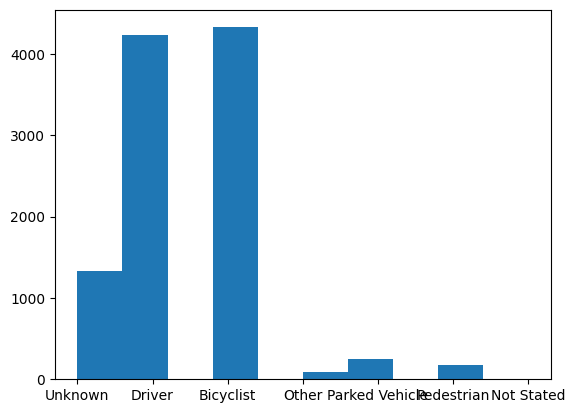

In [ ]:
all_data = pd.read_csv('../data/bike_crashes.csv')
# Filter rows where either party type is a bicyclist
bike_data = all_data[(all_data['party1_type'].str.contains('bicyclist', case=False, na=False)) |
                     (all_data['party2_type'].str.contains('bicyclist', case=False, na=False))]
                     # Add a column to bike_data showing the string name of the party at fault

def resolve_party_at_fault(row):
    if pd.isna(row['party_at_fault']):
        return None
    if row['party_at_fault'] == 1:
        return row['party1_type']
    elif row['party_at_fault'] == 2:
        return row['party2_type']
    return None

bike_data['party_at_fault_name'] = bike_data.apply(resolve_party_at_fault, axis=1)
plt.hist(bike_data['party_at_fault_name'].fillna('Unknown'))
plt.title('Histogram of Party at Fault for Bicycle Crashes in SF')
plt.xlabel('Party at Fault')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

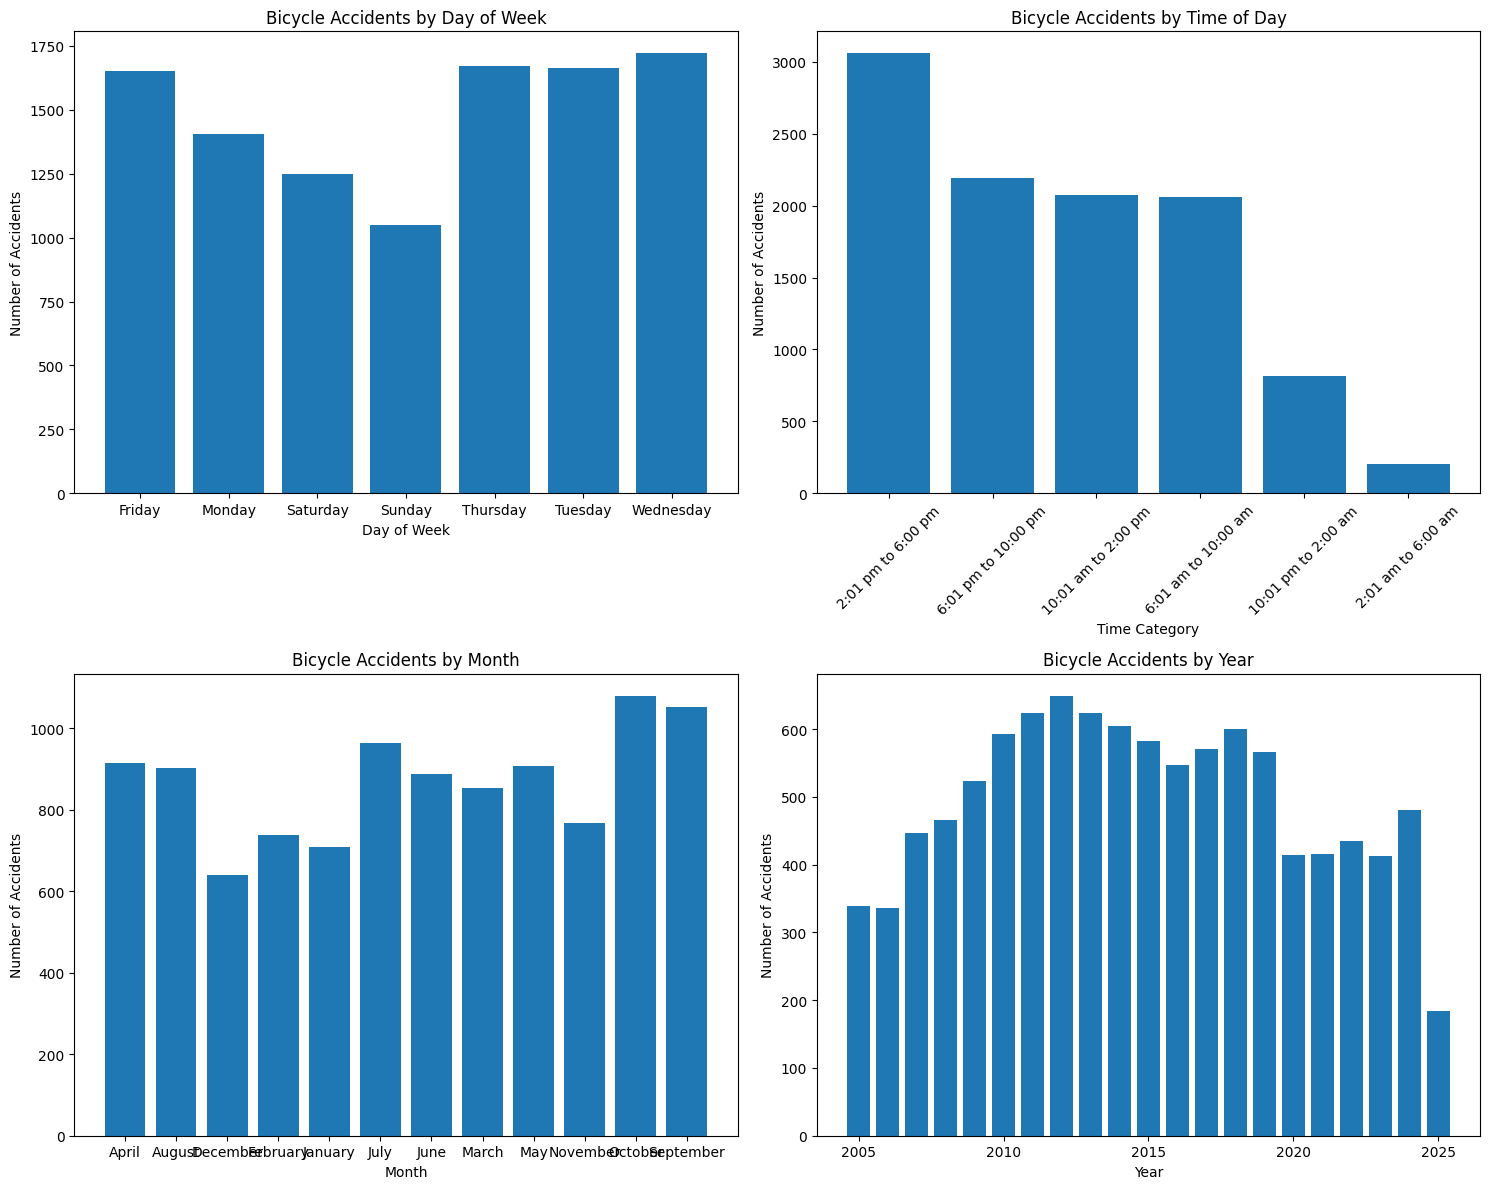

TEMPORAL INSIGHTS:
Peak day for accidents: Wednesday (1721 accidents)
Peak time for accidents: 2:01 pm to 6:00 pm (3059 accidents)
Peak month for accidents: October (1079 accidents)


In [3]:
# 1. TEMPORAL PATTERNS: When do bicycle accidents occur most frequently?

# Create subplots for temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accidents by day of week
day_counts = bike_data['day_of_week'].value_counts().sort_index()
axes[0,0].bar(day_counts.index, day_counts.values)
axes[0,0].set_title('Bicycle Accidents by Day of Week')
axes[0,0].set_xlabel('Day of Week')
axes[0,0].set_ylabel('Number of Accidents')

# Accidents by hour/time category
time_counts = bike_data['time_cat'].value_counts()
axes[0,1].bar(time_counts.index, time_counts.values)
axes[0,1].set_title('Bicycle Accidents by Time of Day')
axes[0,1].set_xlabel('Time Category')
axes[0,1].set_ylabel('Number of Accidents')
axes[0,1].tick_params(axis='x', rotation=45)

# Accidents by month
month_counts = bike_data['month'].value_counts().sort_index()
axes[1,0].bar(month_counts.index, month_counts.values)
axes[1,0].set_title('Bicycle Accidents by Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Accidents')

# Accidents by year
year_counts = bike_data['accident_year'].value_counts().sort_index()
axes[1,1].bar(year_counts.index, year_counts.values)
axes[1,1].set_title('Bicycle Accidents by Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

print("TEMPORAL INSIGHTS:")
print(f"Peak day for accidents: {day_counts.idxmax()} ({day_counts.max()} accidents)")
print(f"Peak time for accidents: {time_counts.idxmax()} ({time_counts.max()} accidents)")
print(f"Peak month for accidents: {month_counts.idxmax()} ({month_counts.max()} accidents)")

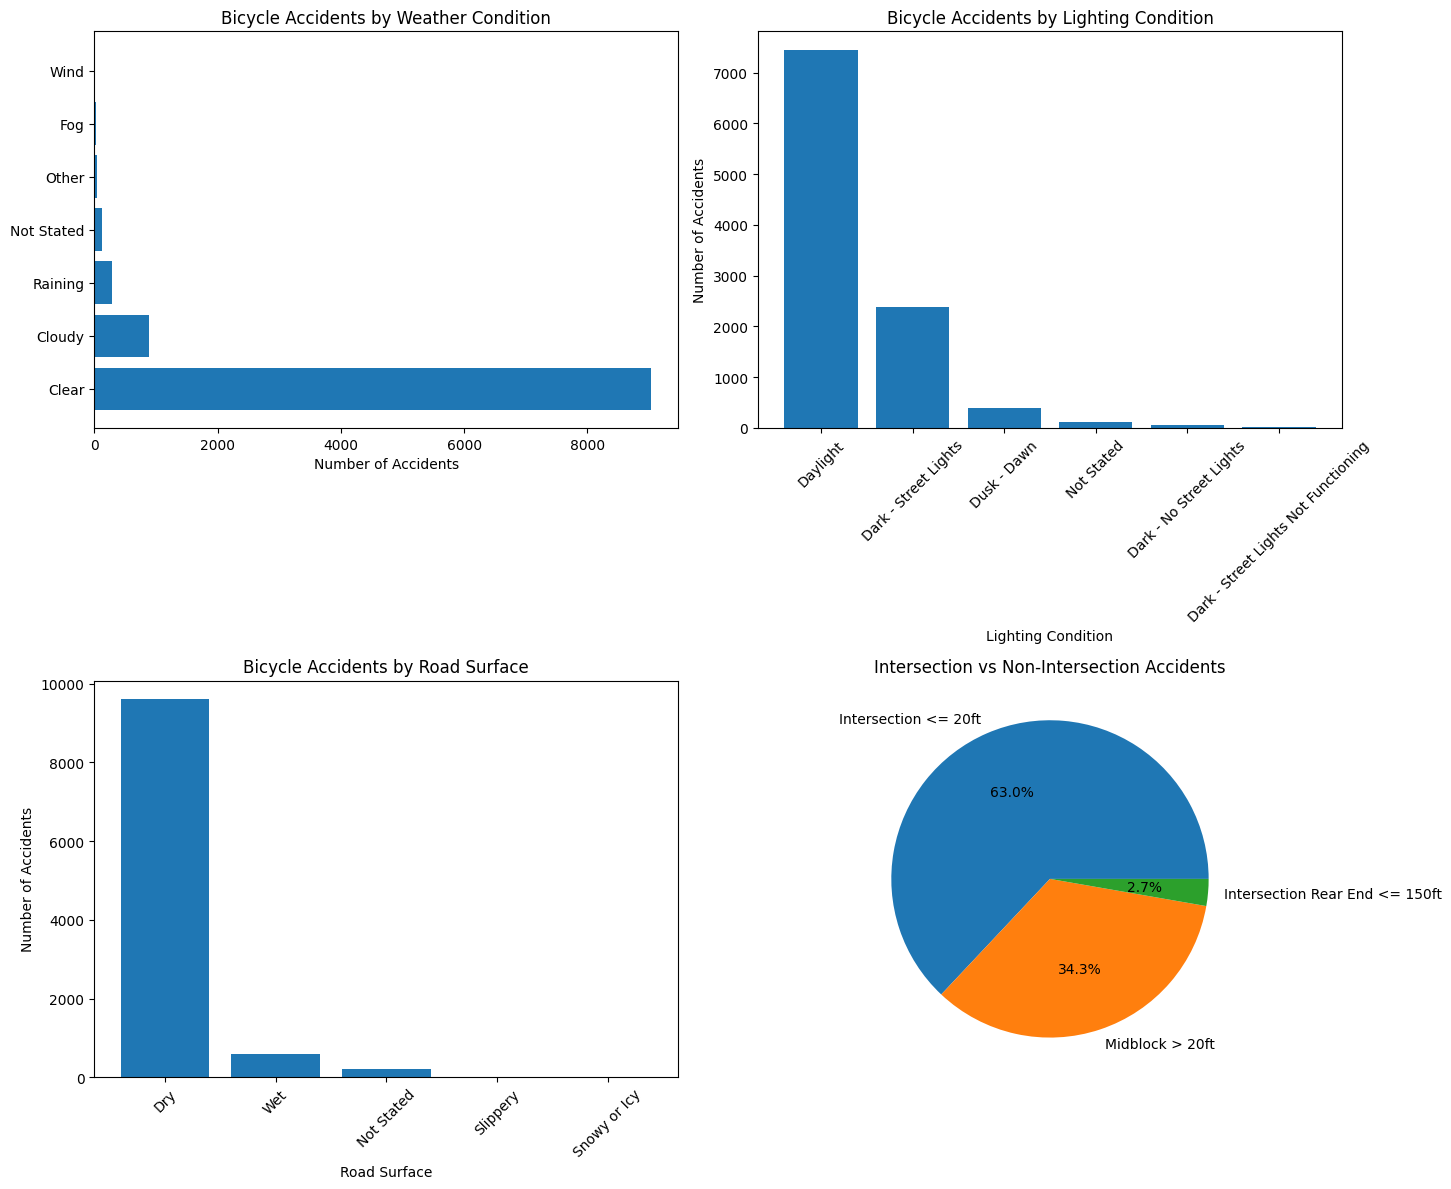

ENVIRONMENTAL INSIGHTS:
Most dangerous weather: Clear (9026 accidents)
Most dangerous lighting: Daylight (7439 accidents)
Most dangerous road surface: Dry (9602 accidents)
Intersection accidents: 0 (0.0%)


In [4]:
# 2. ENVIRONMENTAL CONDITIONS: Weather, lighting, and road conditions

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Weather conditions
weather_counts = bike_data['weather_1'].value_counts().head(10)
axes[0,0].barh(weather_counts.index, weather_counts.values)
axes[0,0].set_title('Bicycle Accidents by Weather Condition')
axes[0,0].set_xlabel('Number of Accidents')

# Lighting conditions
lighting_counts = bike_data['lighting'].value_counts()
axes[0,1].bar(lighting_counts.index, lighting_counts.values)
axes[0,1].set_title('Bicycle Accidents by Lighting Condition')
axes[0,1].set_xlabel('Lighting Condition')
axes[0,1].set_ylabel('Number of Accidents')
axes[0,1].tick_params(axis='x', rotation=45)

# Road surface conditions
road_surface_counts = bike_data['road_surface'].value_counts()
axes[1,0].bar(road_surface_counts.index, road_surface_counts.values)
axes[1,0].set_title('Bicycle Accidents by Road Surface')
axes[1,0].set_xlabel('Road Surface')
axes[1,0].set_ylabel('Number of Accidents')
axes[1,0].tick_params(axis='x', rotation=45)

# Intersection vs non-intersection
intersection_counts = bike_data['intersection'].value_counts()
axes[1,1].pie(intersection_counts.values, labels=intersection_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Intersection vs Non-Intersection Accidents')

plt.tight_layout()
plt.show()

print("ENVIRONMENTAL INSIGHTS:")
print(f"Most dangerous weather: {weather_counts.index[0]} ({weather_counts.iloc[0]} accidents)")
print(f"Most dangerous lighting: {lighting_counts.idxmax()} ({lighting_counts.max()} accidents)")
print(f"Most dangerous road surface: {road_surface_counts.idxmax()} ({road_surface_counts.max()} accidents)")
print(f"Intersection accidents: {intersection_counts.get('Y', 0)} ({intersection_counts.get('Y', 0)/(intersection_counts.sum())*100:.1f}%)")

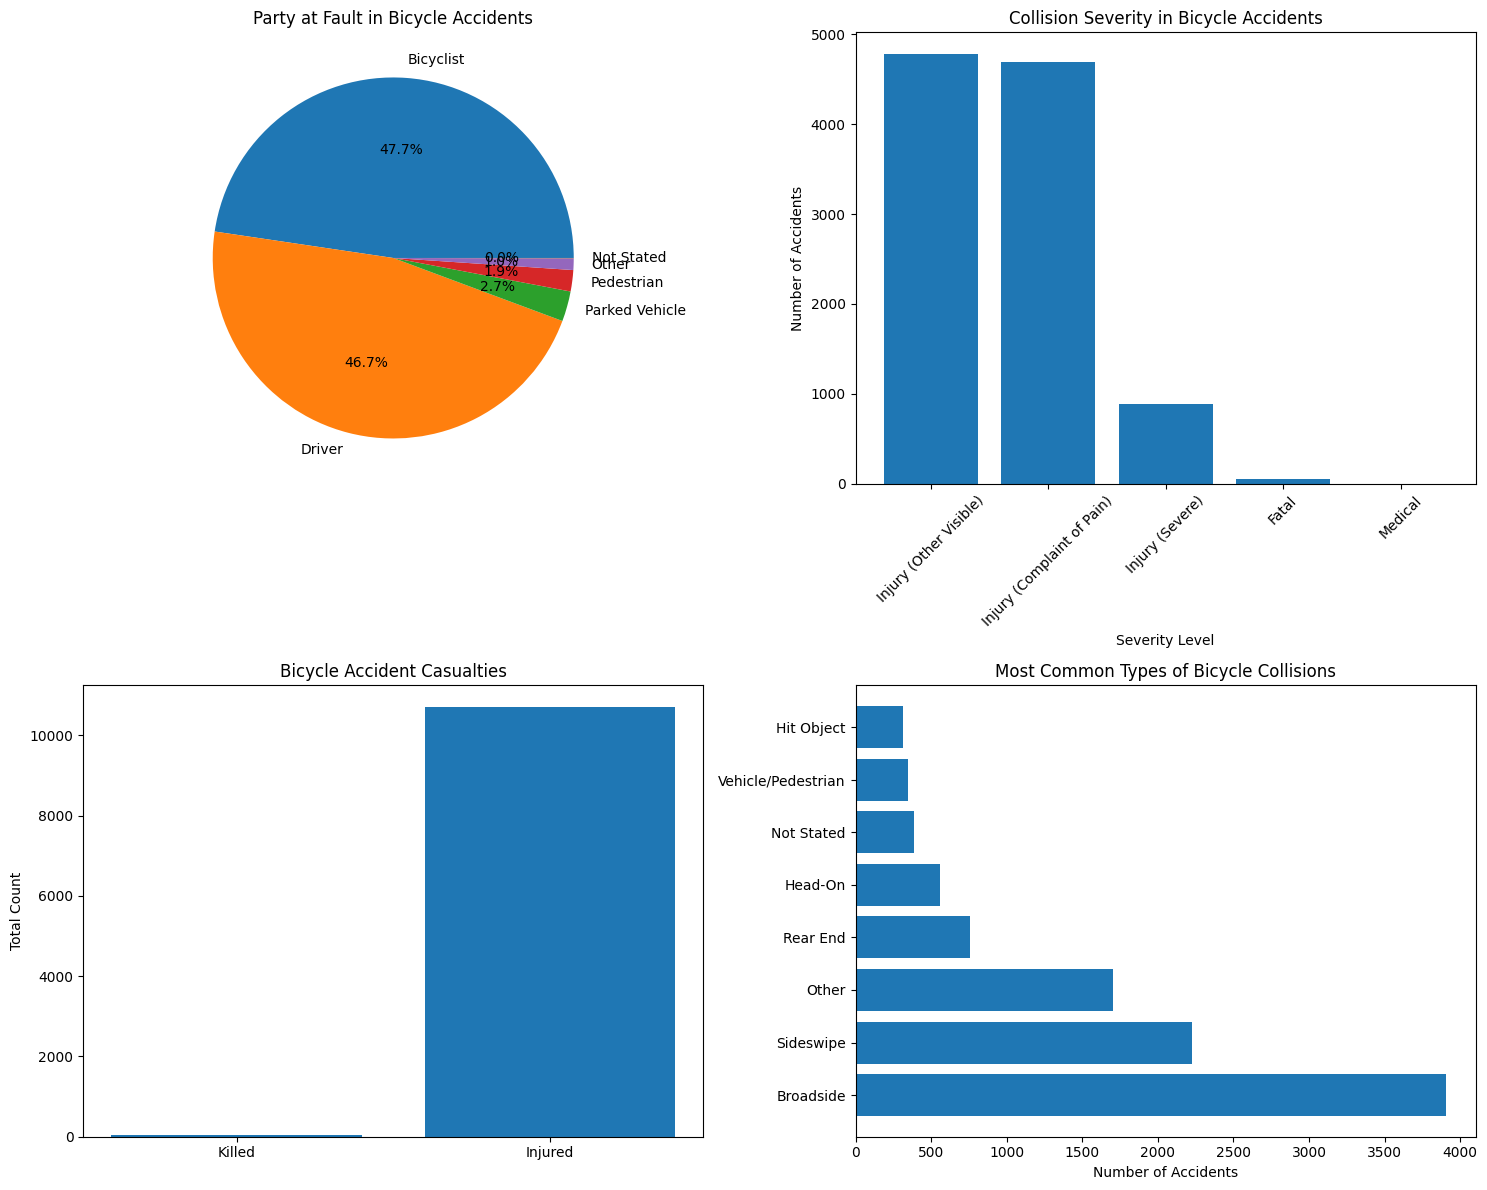

FAULT AND SEVERITY INSIGHTS:
Bicyclists at fault: 4325 out of 9075 cases (47.7%)
Total fatalities: 48.0
Total injuries: 10706
Most severe collision type: Injury (Other Visible) (4784 cases)
Most common collision type: Broadside (3907 cases)


In [7]:
# 3. FAULT ANALYSIS AND SEVERITY: Who's at fault and how severe are the injuries?

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Party at fault analysis
fault_counts = bike_data['party_at_fault_name'].value_counts()
axes[0,0].pie(fault_counts.values, labels=fault_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Party at Fault in Bicycle Accidents')

# Collision severity
severity_counts = bike_data['collision_severity'].value_counts()
axes[0,1].bar(severity_counts.index, severity_counts.values)
axes[0,1].set_title('Collision Severity in Bicycle Accidents')
axes[0,1].set_xlabel('Severity Level')
axes[0,1].set_ylabel('Number of Accidents')
axes[0,1].tick_params(axis='x', rotation=45)

# Number killed vs injured
total_killed = bike_data['number_killed'].sum()
total_injured = bike_data['number_injured'].sum()
casualties = ['Killed', 'Injured']
casualty_counts = [total_killed, total_injured]
axes[1,0].bar(casualties, casualty_counts)
axes[1,0].set_title('Bicycle Accident Casualties')
axes[1,0].set_ylabel('Total Count')

# Type of collision
collision_type_counts = bike_data['type_of_collision'].value_counts().head(8)
axes[1,1].barh(collision_type_counts.index, collision_type_counts.values)
axes[1,1].set_title('Most Common Types of Bicycle Collisions')
axes[1,1].set_xlabel('Number of Accidents')

plt.tight_layout()
plt.show()

# Calculate bicyclist fault percentage
bicyclist_at_fault = bike_data['party_at_fault_name'].str.contains('bicyclist', case=False, na=False).sum()
total_with_fault_data = bike_data['party_at_fault_name'].notna().sum()

print("FAULT AND SEVERITY INSIGHTS:")
print(f"Bicyclists at fault: {bicyclist_at_fault} out of {total_with_fault_data} cases ({bicyclist_at_fault/total_with_fault_data*100:.1f}%)")
print(f"Total fatalities: {total_killed}")
print(f"Total injuries: {total_injured}")
print(f"Most severe collision type: {severity_counts.idxmax()} ({severity_counts.max()} cases)")
print(f"Most common collision type: {collision_type_counts.index[0]} ({collision_type_counts.iloc[0]} cases)")

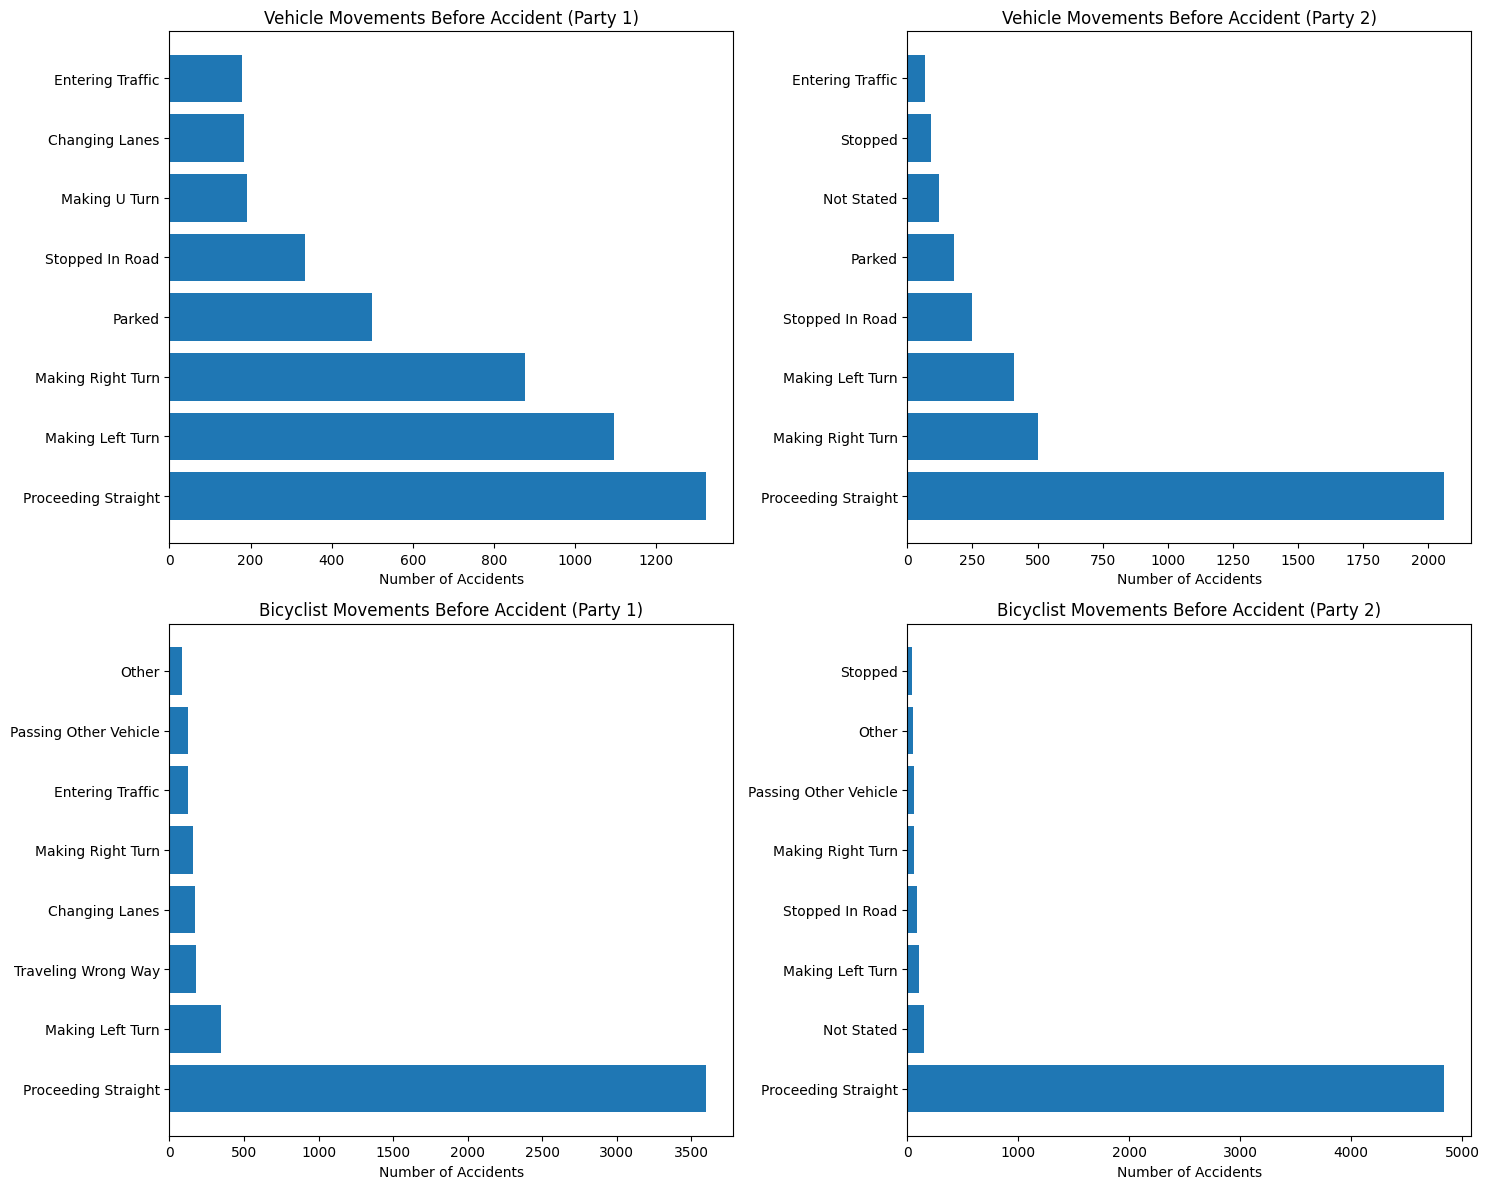

MOVEMENT PATTERN INSIGHTS:
Most dangerous vehicle movement: Proceeding Straight (1323 accidents)
Most dangerous bicyclist movement (P1): Proceeding Straight (3600 accidents)
Most dangerous bicyclist movement (P2): Proceeding Straight (4838 accidents)


In [8]:
# 5. MOVEMENT PATTERNS: What movements lead to bicycle accidents?

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Party 1 movements (when party 1 is not the bicyclist)
party1_movements = bike_data[~bike_data['party1_type'].str.contains('bicyclist', case=False, na=False)]['party1_move_pre_acc'].value_counts().head(8)
axes[0,0].barh(party1_movements.index, party1_movements.values)
axes[0,0].set_title('Vehicle Movements Before Accident (Party 1)')
axes[0,0].set_xlabel('Number of Accidents')

# Party 2 movements (when party 2 is not the bicyclist)
party2_movements = bike_data[~bike_data['party2_type'].str.contains('bicyclist', case=False, na=False)]['party2_move_pre_acc'].value_counts().head(8)
axes[0,1].barh(party2_movements.index, party2_movements.values)
axes[0,1].set_title('Vehicle Movements Before Accident (Party 2)')
axes[0,1].set_xlabel('Number of Accidents')

# Bicyclist movements (when party 1 is bicyclist)
bike_movements_p1 = bike_data[bike_data['party1_type'].str.contains('bicyclist', case=False, na=False)]['party1_move_pre_acc'].value_counts().head(8)
axes[1,0].barh(bike_movements_p1.index, bike_movements_p1.values)
axes[1,0].set_title('Bicyclist Movements Before Accident (Party 1)')
axes[1,0].set_xlabel('Number of Accidents')

# Bicyclist movements (when party 2 is bicyclist)
bike_movements_p2 = bike_data[bike_data['party2_type'].str.contains('bicyclist', case=False, na=False)]['party2_move_pre_acc'].value_counts().head(8)
axes[1,1].barh(bike_movements_p2.index, bike_movements_p2.values)
axes[1,1].set_title('Bicyclist Movements Before Accident (Party 2)')
axes[1,1].set_xlabel('Number of Accidents')

plt.tight_layout()
plt.show()

print("MOVEMENT PATTERN INSIGHTS:")
if len(party1_movements) > 0:
    print(f"Most dangerous vehicle movement: {party1_movements.index[0]} ({party1_movements.iloc[0]} accidents)")
if len(bike_movements_p1) > 0:
    print(f"Most dangerous bicyclist movement (P1): {bike_movements_p1.index[0]} ({bike_movements_p1.iloc[0]} accidents)")
if len(bike_movements_p2) > 0:
    print(f"Most dangerous bicyclist movement (P2): {bike_movements_p2.index[0]} ({bike_movements_p2.iloc[0]} accidents)")

# KEY SAFETY RECOMMENDATIONS FOR CYCLISTS

## 🚨 HIGH-PRIORITY SAFETY RECOMMENDATIONS

### 1. **Temporal Safety Strategy**
- **Avoid peak accident times**: Be extra vigilant during identified peak hours and days
- **Weekend awareness**: If weekends show higher accident rates, plan safer routes
- **Seasonal adjustments**: Increase safety measures during peak accident months

### 2. **Environmental Conditions**
- **Weather preparedness**: Exercise extreme caution during identified dangerous weather conditions
- **Lighting equipment**: Invest in high-quality lights for low-visibility conditions
- **Road surface awareness**: Reduce speed and increase following distance on dangerous road surfaces
- **Intersection vigilance**: Pay extra attention at intersections where most accidents occur

### 3. **Geographic Risk Management**
- **Route planning**: Avoid high-risk neighborhoods when possible, or use extra caution
- **Local awareness**: Research accident patterns in your regular cycling areas
- **Alternative routes**: Identify safer alternative routes through high-risk areas

### 4. **Defensive Cycling Practices**
- **Movement awareness**: Be extra cautious when performing identified high-risk movements
- **Vehicle behavior**: Watch for dangerous vehicle movements that commonly lead to accidents
- **Fault prevention**: Focus on defensive riding since a significant percentage of accidents involve cyclist fault

## 🛡️ ACTIONABLE SAFETY MEASURES

### Equipment Recommendations
1. **High-visibility clothing** during peak accident times
2. **Quality lighting systems** for identified dangerous lighting conditions
3. **Protective gear** appropriate for collision severity patterns
4. **Weather-appropriate gear** for dangerous weather conditions

### Behavioral Recommendations
1. **Defensive positioning** at intersections
2. **Predictable movements** to reduce misunderstandings with vehicles
3. **Speed management** in high-risk areas and conditions
4. **Constant vigilance** during identified peak risk periods

### Route Planning
1. **Avoid high-risk neighborhoods** during peak times
2. **Use protected bike lanes** when available in dangerous areas
3. **Plan alternative routes** for adverse weather conditions
4. **Research local accident patterns** before cycling in new areas